# Computer Exercise \#07 - Neural Networks

## Computer Exercise 7.1 (Multilayer Perceptrons for Classification):

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_circles

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

import pandas as pd
import seaborn as sns

### Create functions for plotting contours and a 3-d plot of the classifier

In [2]:
# Plot the decision function for a classifier clf
#
def plot_classifier(X):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal', adjustable='box')
    data = pd.DataFrame(X,columns=["x1","x2"])
    sns.scatterplot(data=data, x="x1", y="x2",  hue=y, palette=['red','blue'])
# create grid to evaluate model
    xx = np.linspace(-2, 2, 100)
    yy = np.linspace(-2, 2, 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.predict_proba(xy)
    Z = Z[:,1].reshape(XX.shape)#.reshape(XX.shape)
# plot decision boundary and margins
    levels = np.arange(0, 0.1, 0.1)
    plt.contour(XX, YY, Z, colors='blue',levels=[0.5], alpha=0.5,linestyles=['--', '-', '--'])

In [3]:
# Make a 3-d plot of the decision surface for classifier clf
#  Range of values for x and y are [-2, 2]
def plot_classifier_3d():
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
    xx = np.linspace(-2, 2, 100)
    yy = np.linspace(-2, 2, 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.predict_proba(xy)
    Z = Z[:,1].reshape(XX.shape)#.reshape(XX.shape)
    surf = ax.plot_surface(XX,YY,Z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
    ax.set_zlim(0, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

## XOR

Create the XOR data set, random values in the four quadrants.

In [4]:
X = np.random.uniform(low=-2, high=2, size=(200,2))
y=(X[:,1]*X[:,0] < 0).astype(int)

Make a scatter plot of the data.

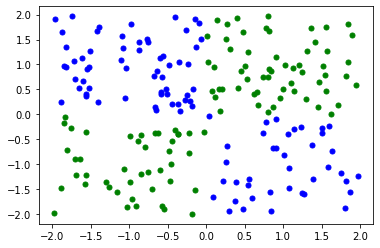

In [5]:
fig, ax = plt.subplots()
colors = ('green', 'blue')
for n_class in range(2):
    ax.scatter(X[y == n_class][:, 0], 
               X[y == n_class][:, 1], 
               c=colors[n_class], 
               s=25, 
               label=str(n_class))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

### Design an MLP 

In [7]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

Output activation function:  logistic
Number of Layers:  3
Number of Iterations:  155
Training accuracy:  1.0
Test accuracy:  1.0


## Questions ##
(a) What is the default activation function for the hidden layers?
> The default activation function is the rectified linear unit function (ReLU).

(b) What is the activation function that is used in the output layer?
> Logistic


### Experiments ###
__(a)__ Design a MLP with one hidden layer for the data set that you created. Begin with
five neurons in the hidden layer. Remember that the network is learned using SGD, so
different initializations of the algorithm may lead to different solutions. Run the classifier
several times and note its performance. Comment on how many iterations are necessary
for convergence and the accuracy of the classifier.

In [8]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  105
Training accuracy:  1.0
Test accuracy:  1.0


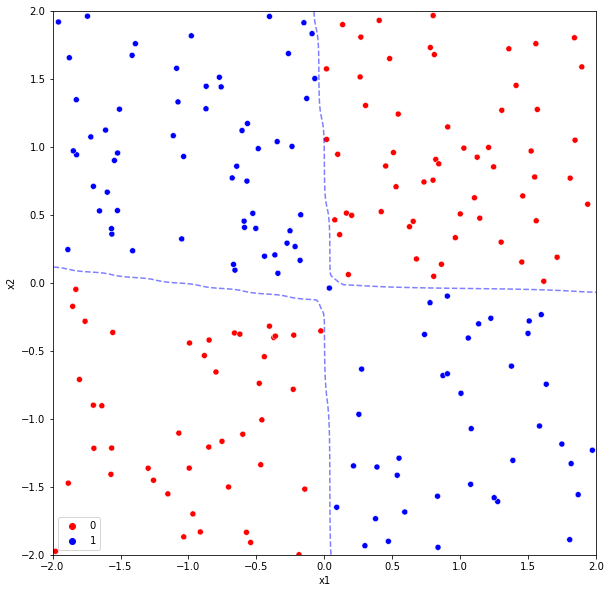

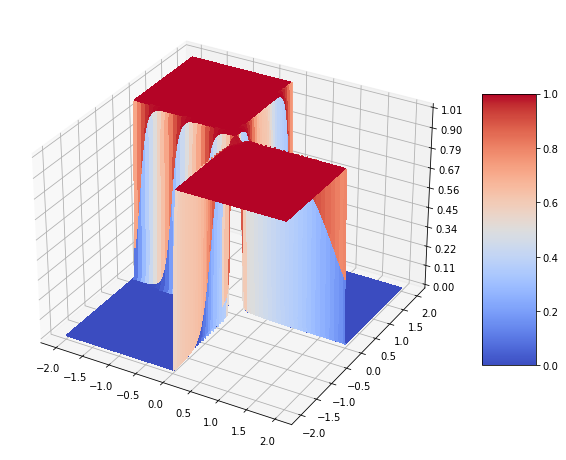

In [9]:
plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  40
Training accuracy:  0.9388888888888889
Test accuracy:  1.0


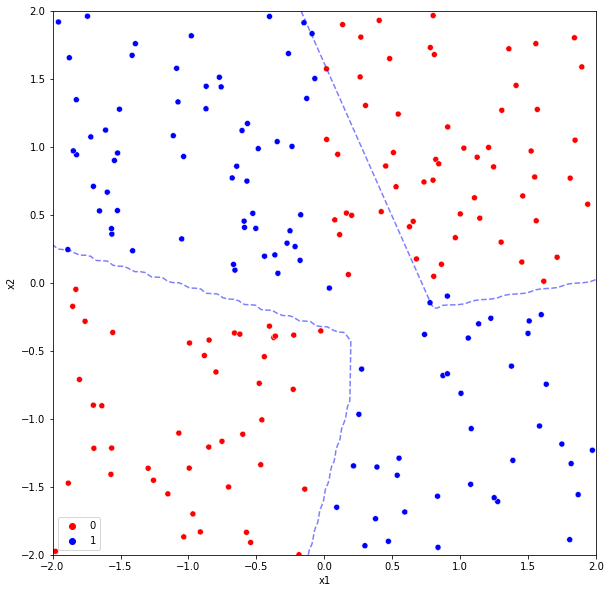

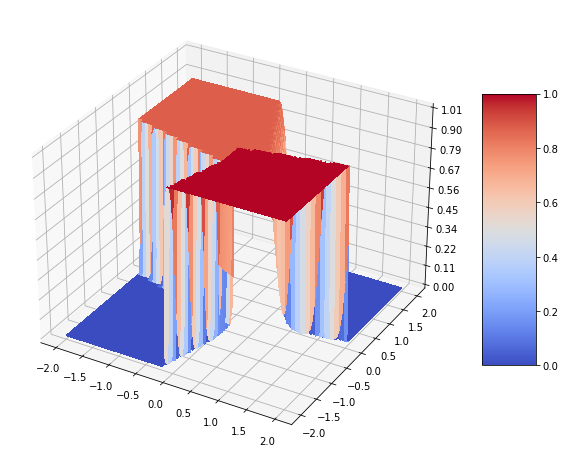

In [13]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

__(b)__ Repeat part (a) using only four neurons. Are you able to train the network to get zero
training error? If so, try three neurons. If not, is there a reason that you can give why it
is impossible to design the classifier with only four neurons?

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  68
Training accuracy:  1.0
Test accuracy:  0.95


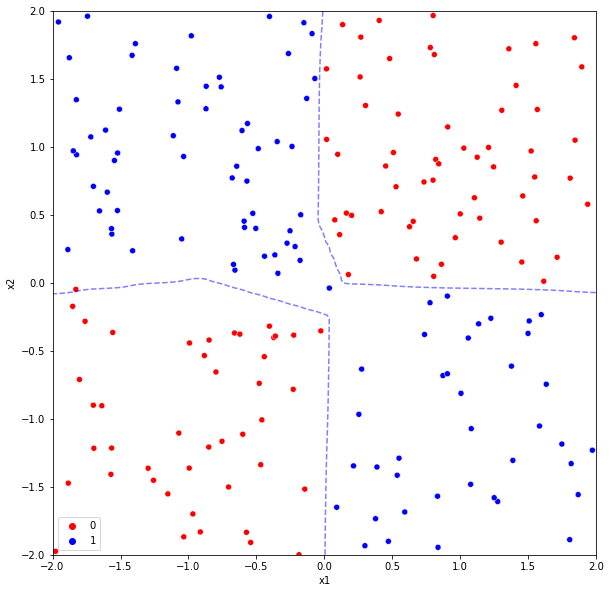

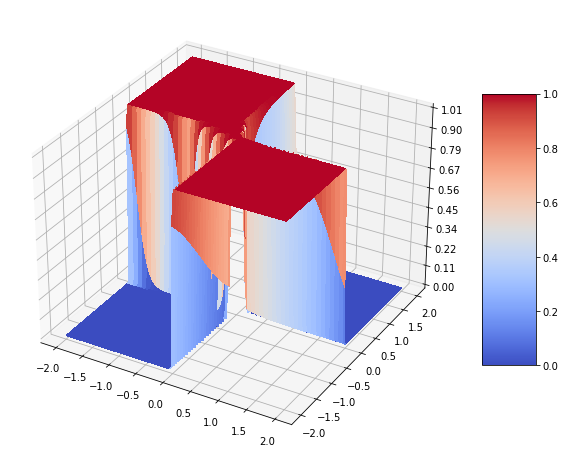

In [17]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(4))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  121
Training accuracy:  1.0
Test accuracy:  1.0


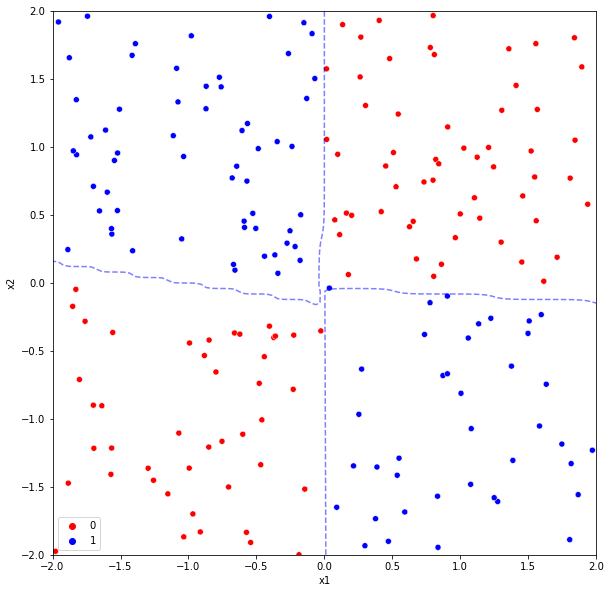

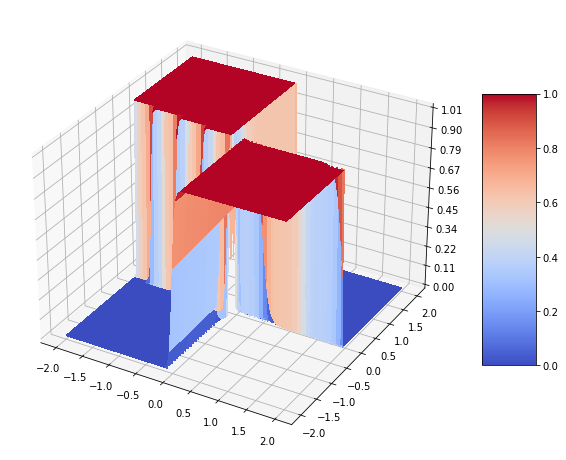

In [19]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(4))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

> As seen above, it is possible to train the network to get zero training error with only 4 hidden layer neurons. Next I will decrease the number of hidden layer neurons to 3.

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  209
Training accuracy:  1.0
Test accuracy:  1.0


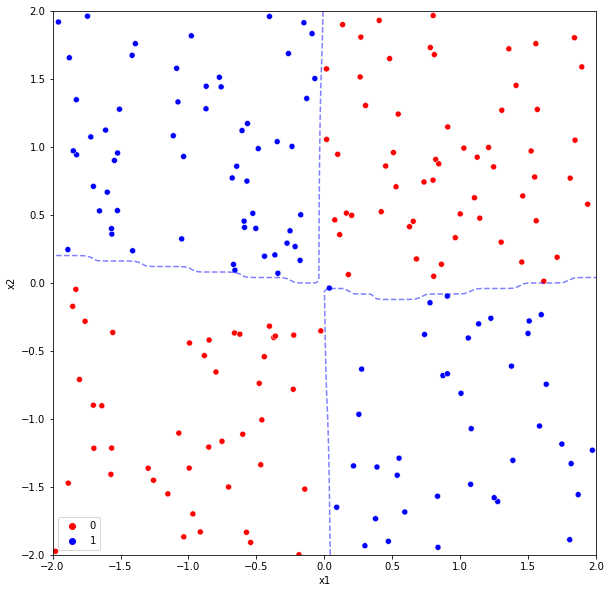

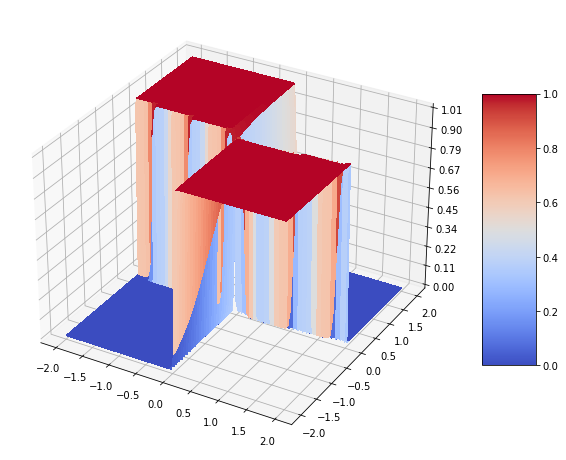

In [23]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(3))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  31
Training accuracy:  0.8055555555555556
Test accuracy:  0.95


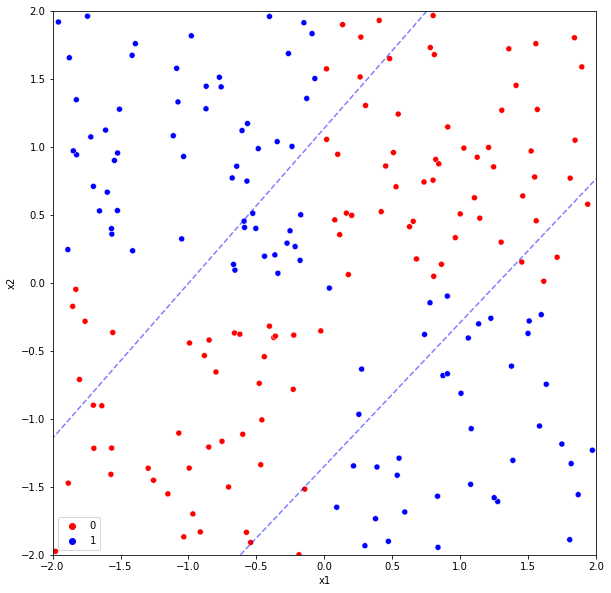

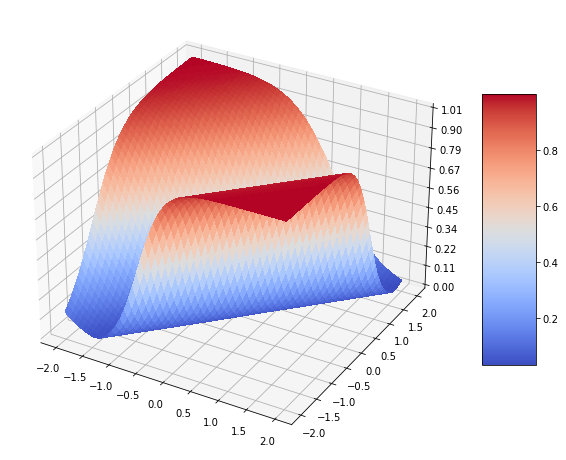

In [30]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(2))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

> While it is possible to also get 0 training error with only 3 hidden neurons, it is not recomended as it took multiple attempts to generate one. Other attempts would result in the results shown in the classifier seen just above. 

__(c)__ What happens if you design a deeper network with two or three hidden layers?

Output activation function:  logistic
Number of Layers:  4
Number of Hidden Layers:  2
Number of Iterations:  336
Training accuracy:  1.0
Test accuracy:  1.0


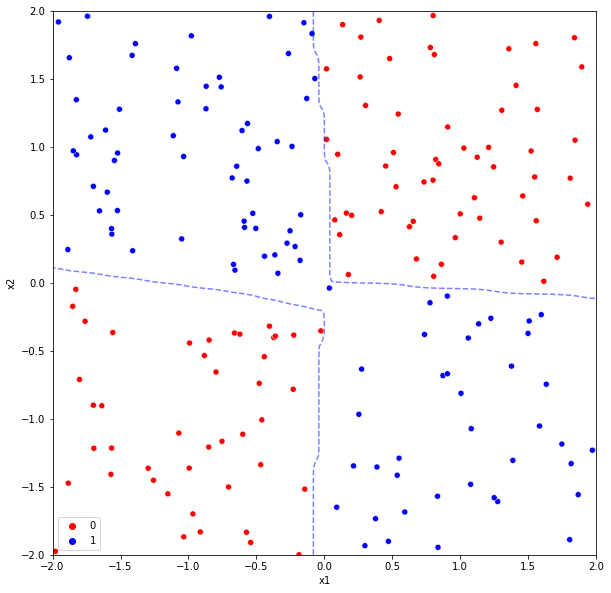

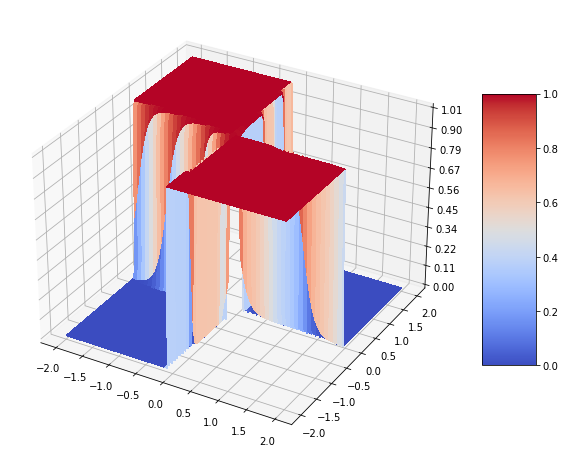

In [32]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(3, 3))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  5
Number of Hidden Layers:  3
Number of Iterations:  80
Training accuracy:  1.0
Test accuracy:  0.95


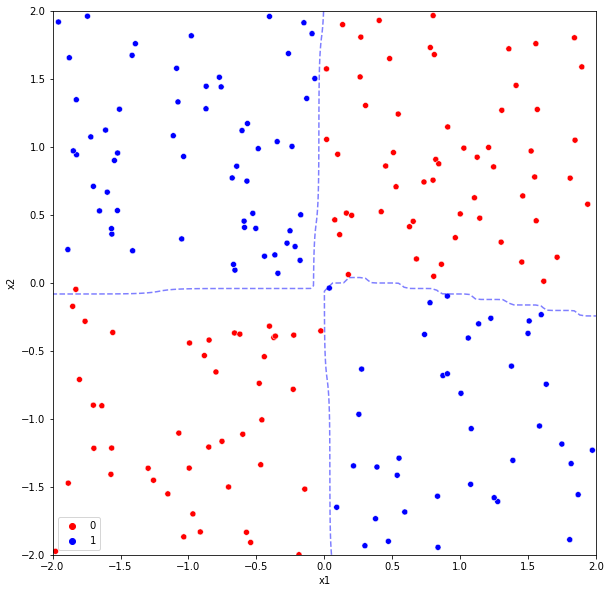

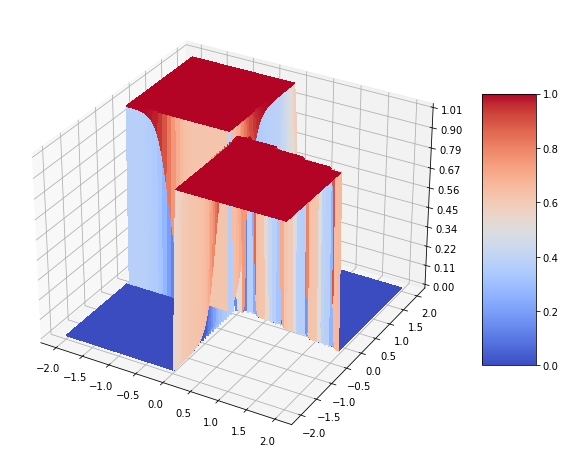

In [34]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(3, 3, 3))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  5
Number of Hidden Layers:  3
Number of Iterations:  168
Training accuracy:  1.0
Test accuracy:  1.0


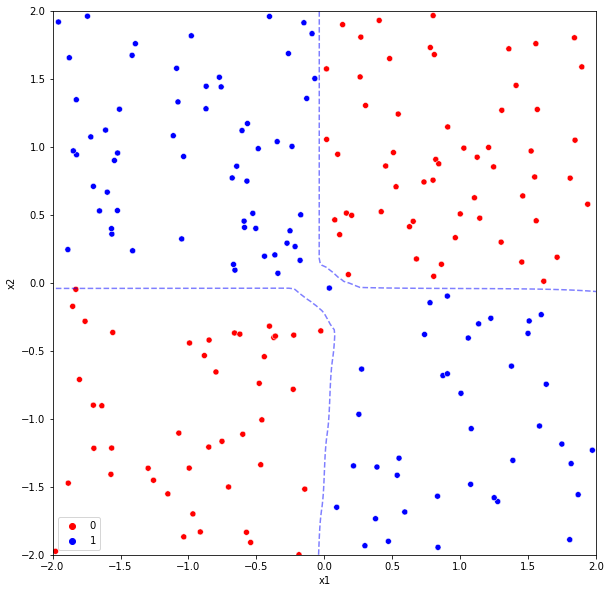

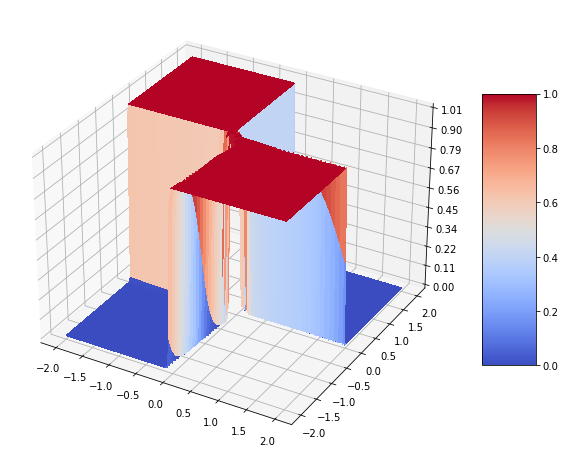

In [37]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(3, 5, 4))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  5
Number of Hidden Layers:  3
Number of Iterations:  121
Training accuracy:  1.0
Test accuracy:  0.95


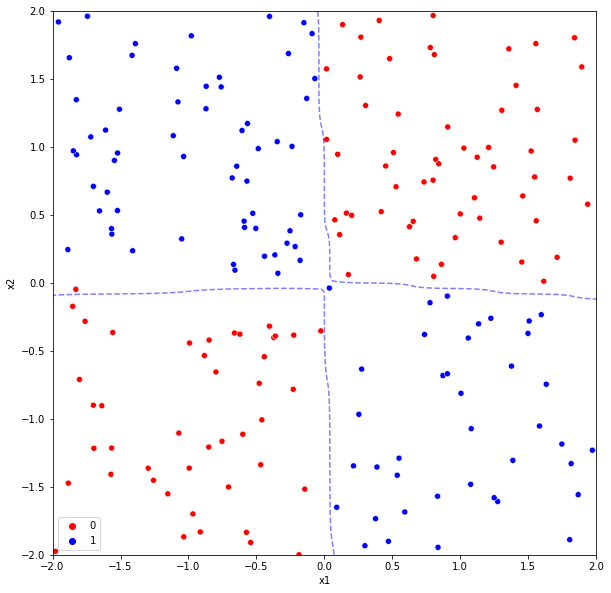

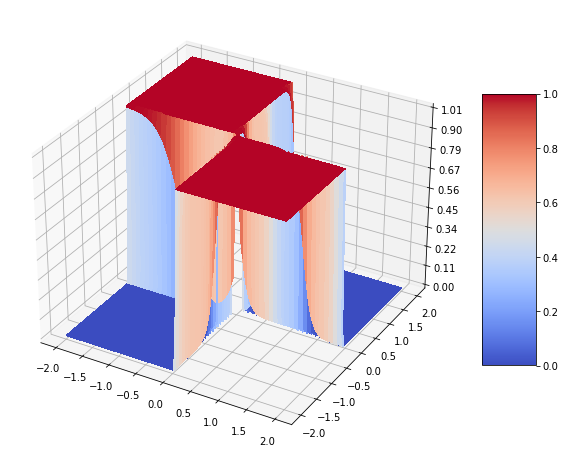

In [39]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(4, 5, 3))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  5
Number of Hidden Layers:  3
Number of Iterations:  141
Training accuracy:  1.0
Test accuracy:  0.95


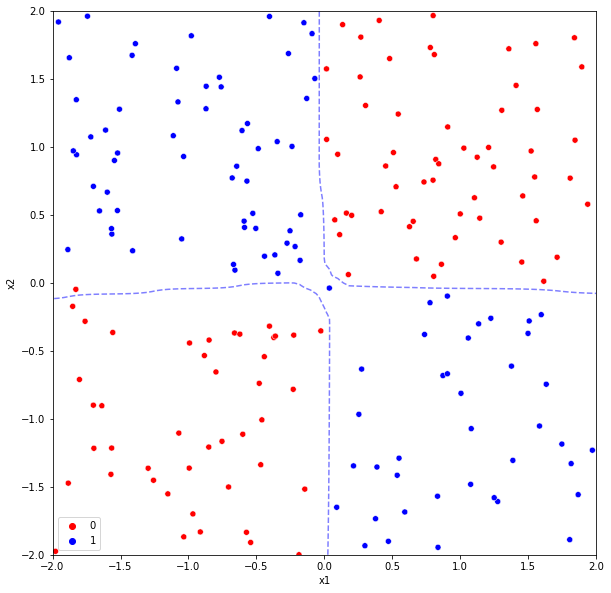

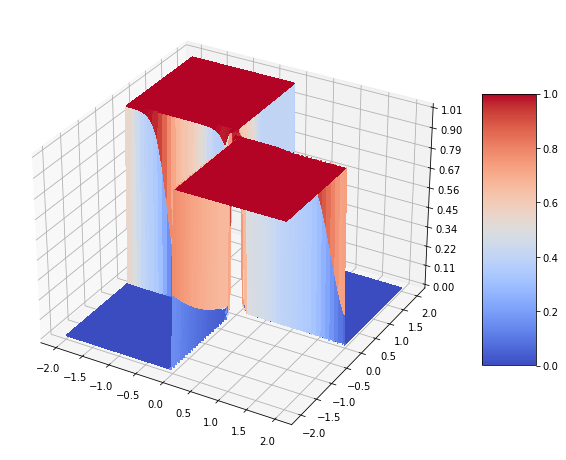

In [40]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5, 5, 5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

> __Answer:__ Adding more hidden layers seems to improve the MLP classifier. Even more so when adding a greater number of hidden layer neurons to each hidden layer. 

__(d)__ Does your design improve or get worse with other activation functions?

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  6
Training accuracy:  0.5944444444444444
Test accuracy:  0.65


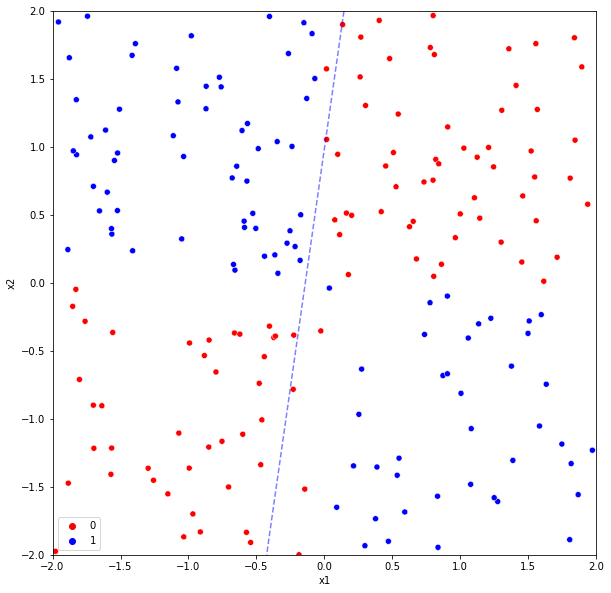

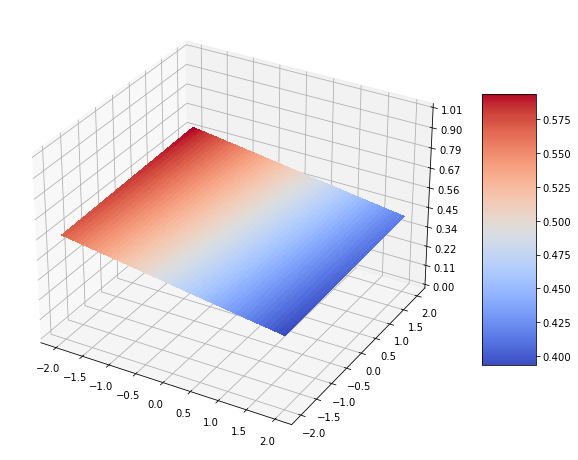

In [41]:
clf = MLPClassifier(activation='identity' , solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  949
Training accuracy:  1.0
Test accuracy:  1.0


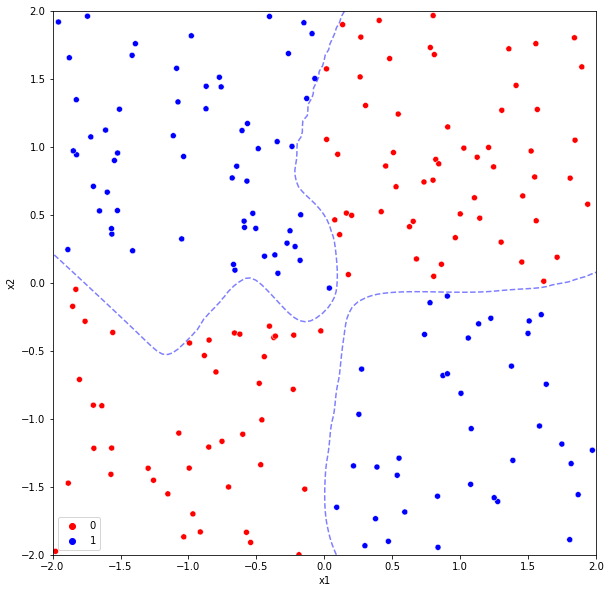

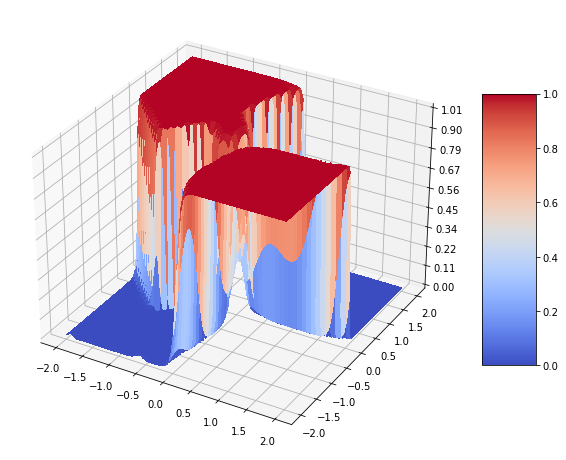

In [42]:
clf = MLPClassifier(activation='logistic' , solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  1523
Training accuracy:  1.0
Test accuracy:  1.0


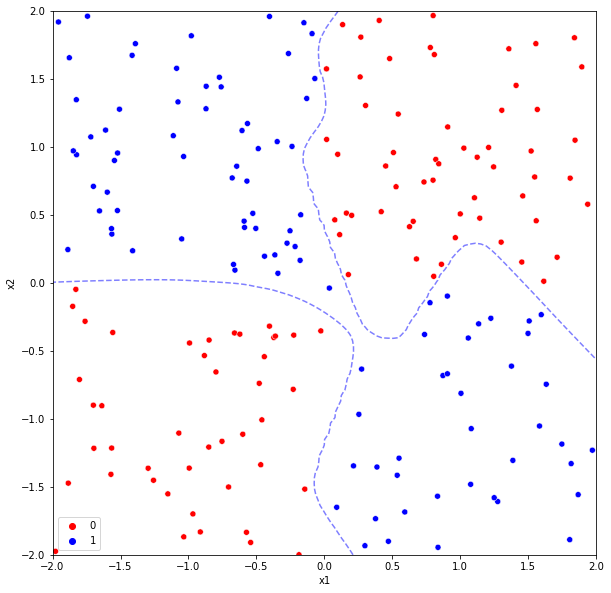

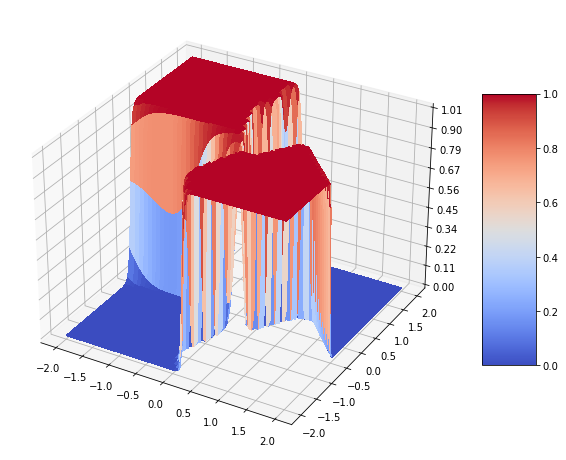

In [43]:
clf = MLPClassifier(activation='tanh' , solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

> I would argue that changing the activation function to anything besides ReLU makes the design __worse__. When it comes to XOR classification, the data samples lying in quadrants one and three have a target value of −1 and those in quadrants two and four have a target value of +1. MLP classifiers with the ReLU activation function are more closely able to approximate this decision boundary fairly well. However, the other activation functions do not come close to pulling off this classification.

### Circles

Create the data set.

In [44]:
X,y=make_circles(n_samples=200, shuffle=True, random_state=None,factor=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

Make a scatter plot.

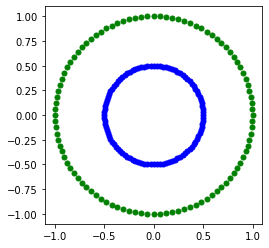

In [45]:
fig, ax = plt.subplots()
colors = ('green', 'blue')

for n_class in range(2):
    ax.scatter(X[y == n_class][:, 0], 
               X[y == n_class][:, 1], 
               c=colors[n_class], 
               s=25, 
               label=str(n_class))
    ax.set_aspect('equal', adjustable='box')

### Design an MLP Classifier

In [46]:
clf = MLPClassifier() # Input your parameters 
clf.fit(X, y)

C:\Users\jgoud\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

### Experiments ###
__(a)__ Repeat the experiments you performed for the XOR data set.

__(a-i.)__ Design a MLP with one hidden layer for the data set that you created. Begin with five neurons in the hidden layer. Remember that the network is learned using SGD, so different initializations of the algorithm may lead to different solutions. Run the classifier several times and note its performance. Comment on how many iterations are necessary for convergence and the accuracy of the classifier.


Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  138
Training accuracy:  1.0
Test accuracy:  1.0


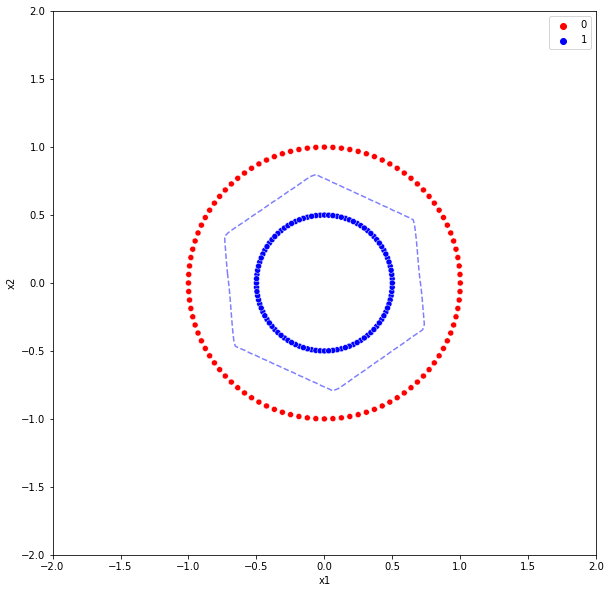

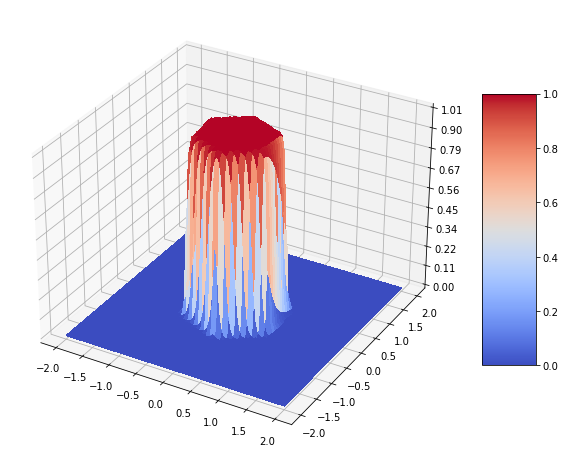

In [59]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  44
Training accuracy:  0.9944444444444445
Test accuracy:  1.0


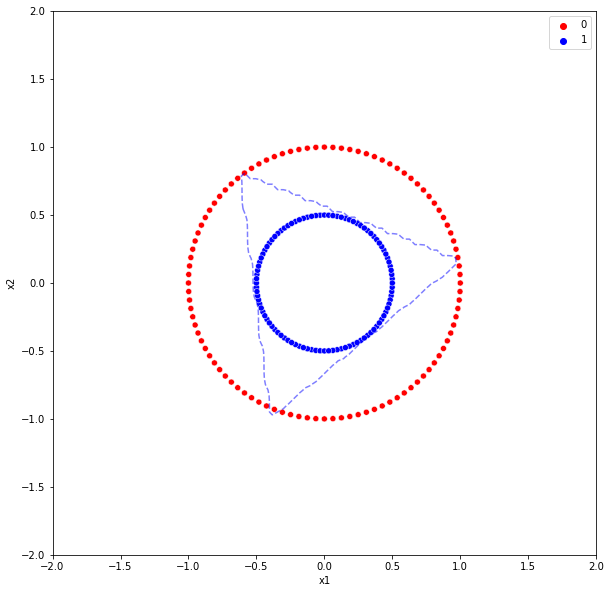

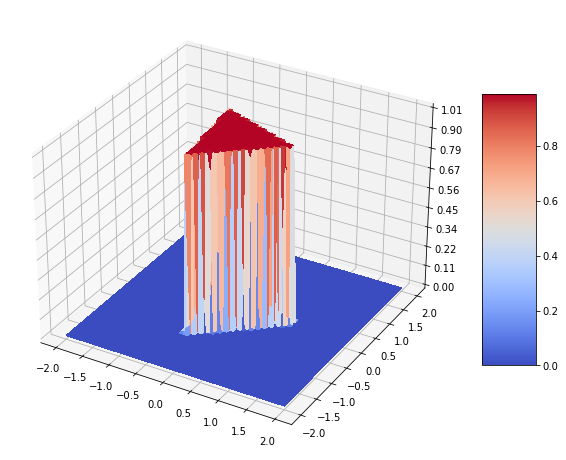

In [63]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

> Above are two examples of the experiment with 5 hidden layer neurons. Each lists the number of iterations necessary for the respective classifier's convergence and the accuracy of said classifier.

__(a-ii.)__ Repeat part (a) using only four neurons. Are you able to train the network to get zero
training error? If so, try three neurons. If not, is there a reason that you can give why it
is impossible to design the classifier with only four neurons?

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  263
Training accuracy:  1.0
Test accuracy:  1.0


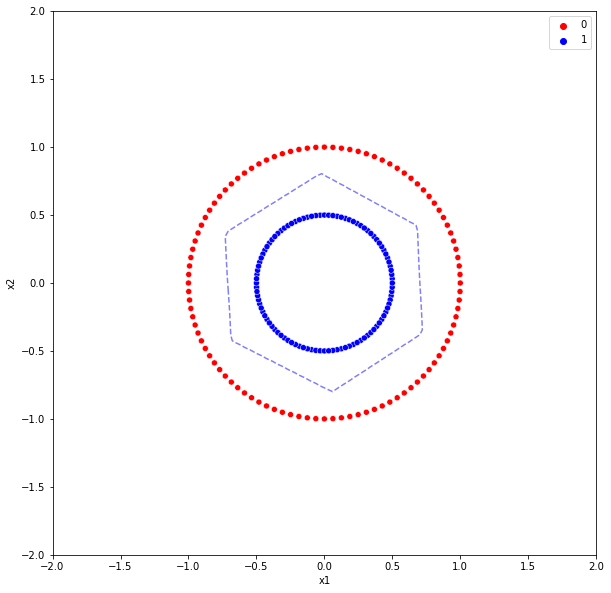

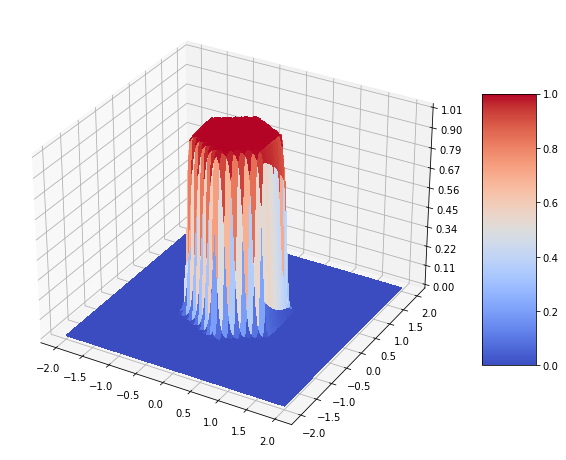

In [68]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(4))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

> As seen above, it is indeed possible to get zero training error from a classifier with only 4 neurons in the hidden layer. Though it did take a number of tries.

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  193
Training accuracy:  1.0
Test accuracy:  1.0


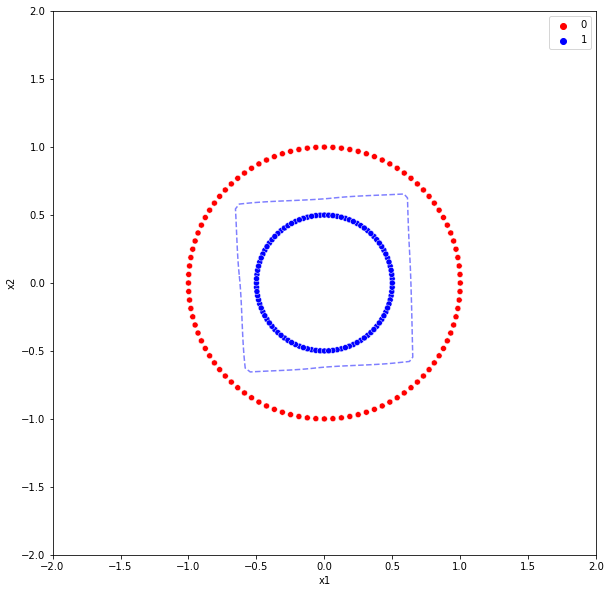

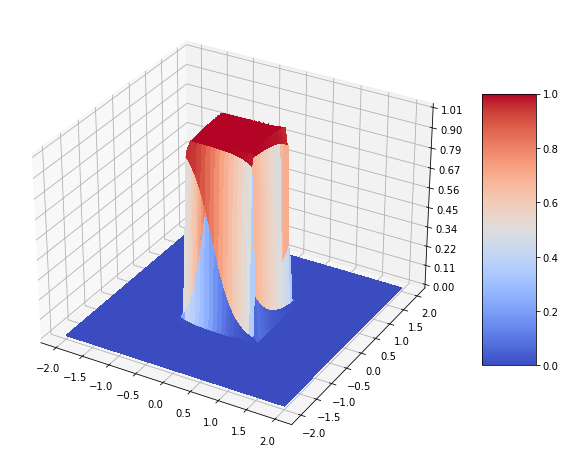

In [77]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(3))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

>It is possible to also get zero training error by using only 3 neurons in the hidden layer. However, this took a substantial number of tries to generate a classifier that would do so. If the data sets were closer together in proximity to each other, this would be made even harder to pull off. So while it is possible, it's not recomended.

__(a-iii.)__ What happens if you design a deeper network with two or three hidden layers?


Output activation function:  logistic
Number of Layers:  4
Number of Hidden Layers:  2
Number of Iterations:  244
Training accuracy:  1.0
Test accuracy:  1.0


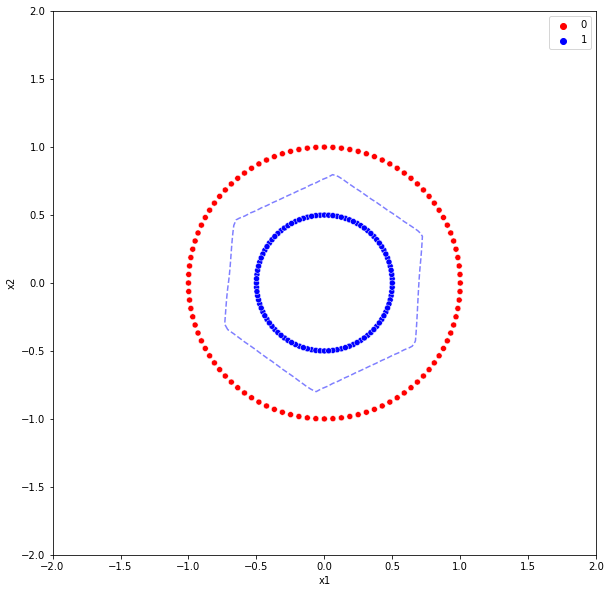

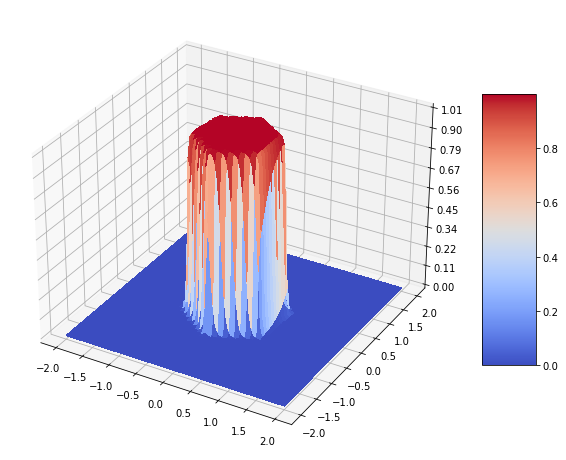

In [80]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5,5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  4
Number of Hidden Layers:  2
Number of Iterations:  111
Training accuracy:  1.0
Test accuracy:  1.0


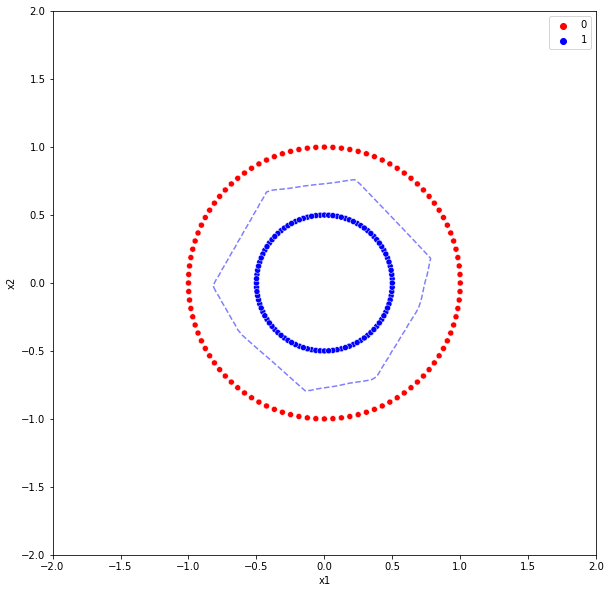

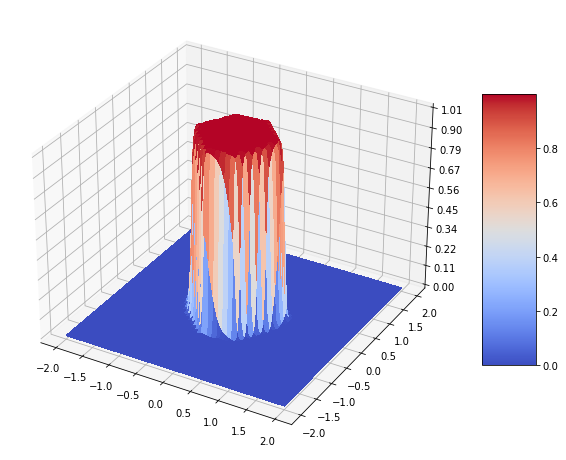

In [79]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(4,5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  4
Number of Hidden Layers:  2
Number of Iterations:  111
Training accuracy:  1.0
Test accuracy:  1.0


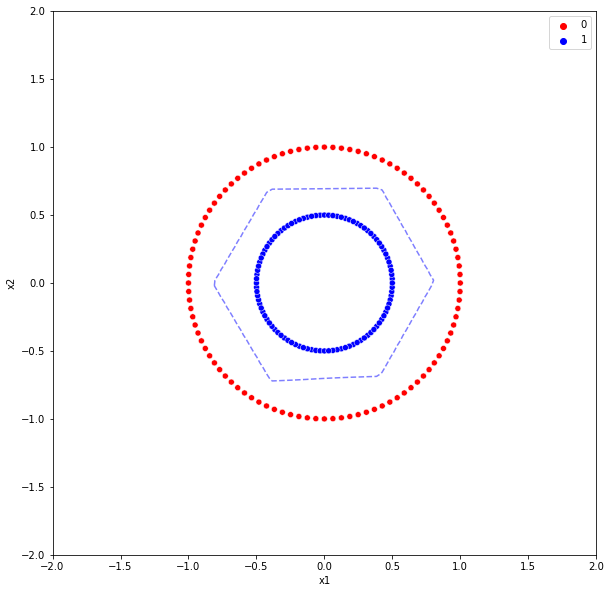

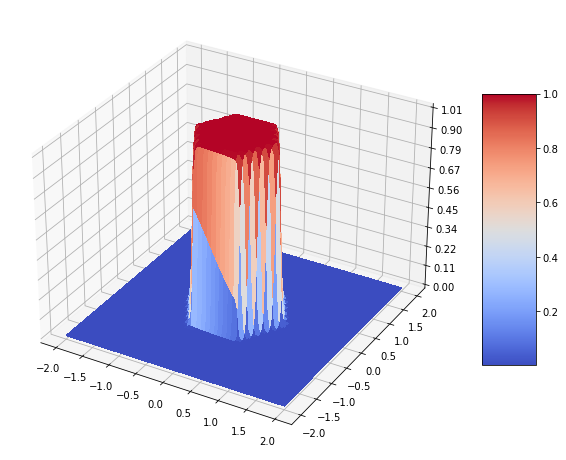

In [90]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(4, 2))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  5
Number of Hidden Layers:  3
Number of Iterations:  235
Training accuracy:  1.0
Test accuracy:  1.0


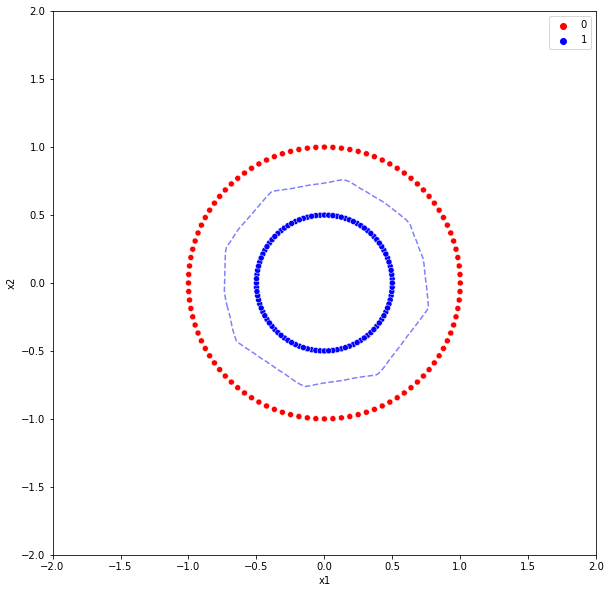

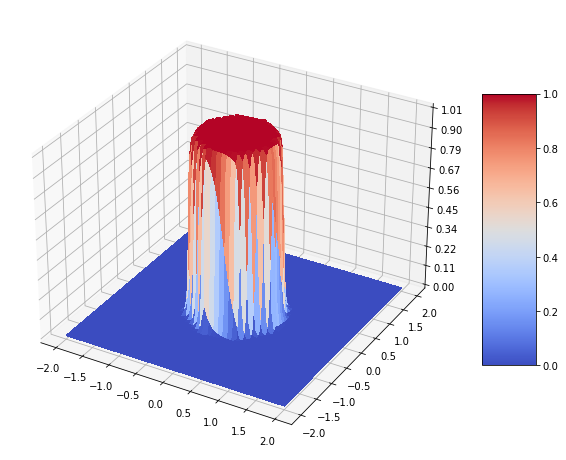

In [91]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5,5,5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  5
Number of Hidden Layers:  3
Number of Iterations:  217
Training accuracy:  1.0
Test accuracy:  1.0


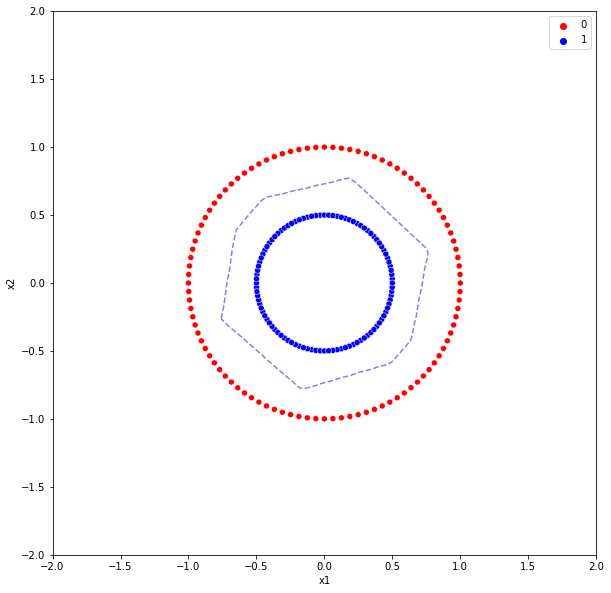

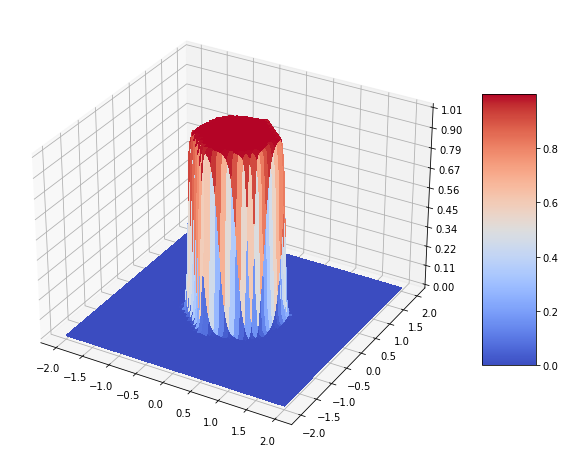

In [96]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(4,5,2))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

> Adding more hidden layers seems to improve the classifiers design. Especially if each hidden layer has more neurons.

__(a-iv.)__ Does your design improve or get worse with other activation functions?

Output activation function:  logistic
Number of Layers:  5
Number of Hidden Layers:  3
Number of Iterations:  9
Training accuracy:  0.40555555555555556
Test accuracy:  0.35


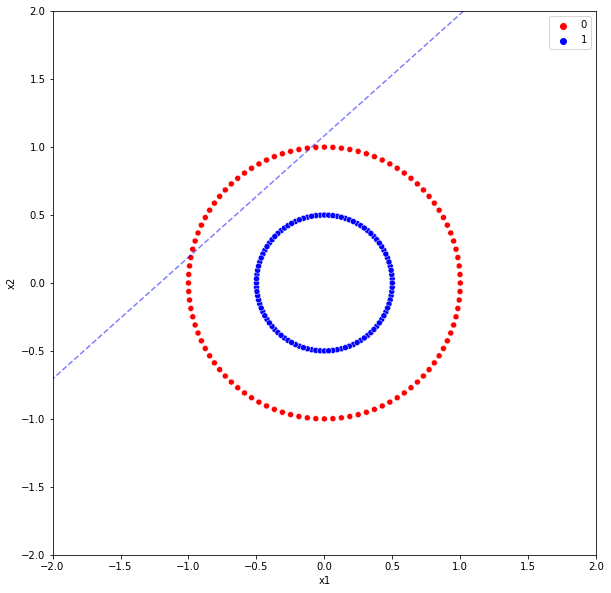

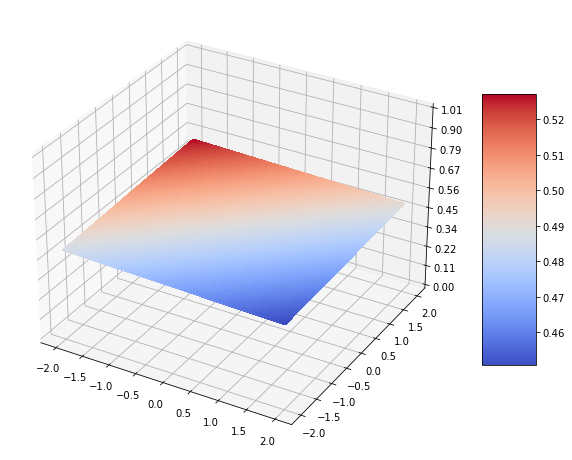

In [98]:
clf = MLPClassifier(activation = 'identity', solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5,5,5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  128
Training accuracy:  1.0
Test accuracy:  1.0


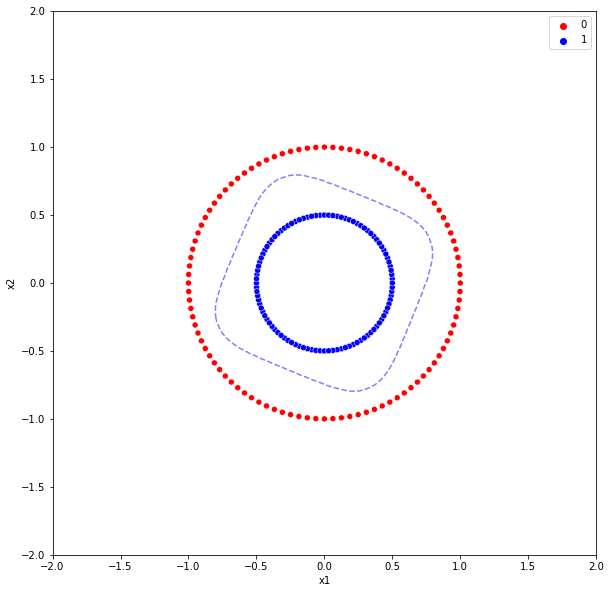

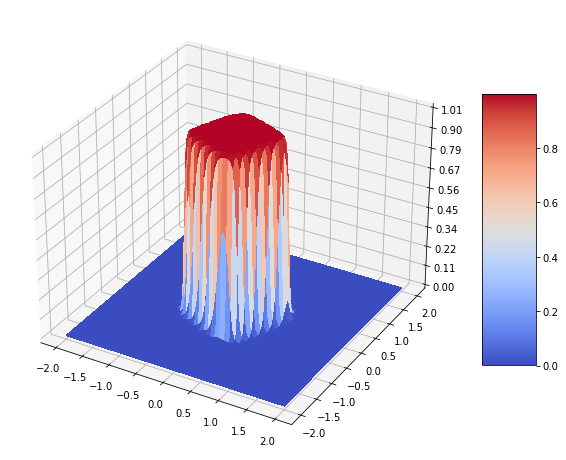

In [108]:
clf = MLPClassifier(activation = 'logistic', solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  5
Number of Hidden Layers:  3
Number of Iterations:  247
Training accuracy:  1.0
Test accuracy:  1.0


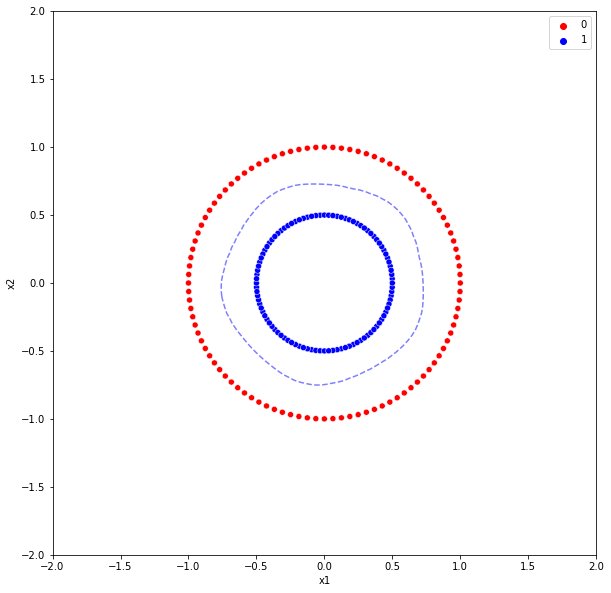

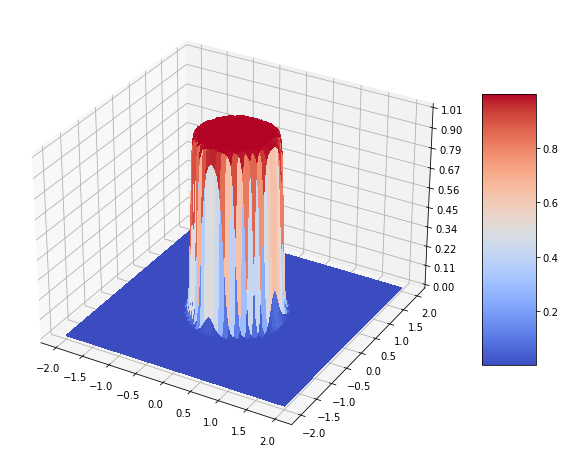

In [99]:
clf = MLPClassifier(activation = 'logistic', solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5,5,5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  96
Training accuracy:  1.0
Test accuracy:  1.0


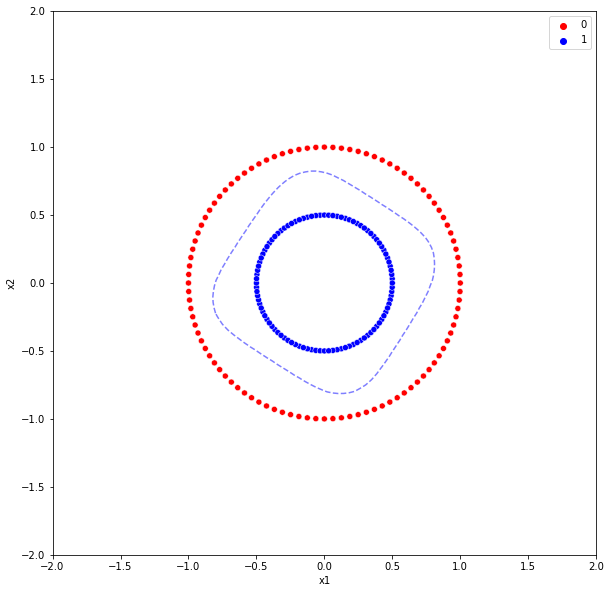

In [101]:
clf = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5)) # 1 hidden layer
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
#plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  87
Training accuracy:  1.0
Test accuracy:  1.0


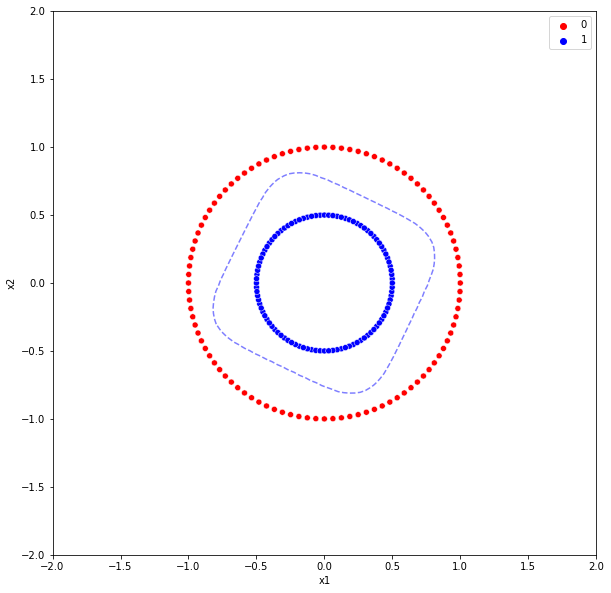

In [104]:
clf = MLPClassifier(activation = 'tanh', solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
#plot_classifier_3d()

> Depending on the activation function used, the design will either improve or get worse. So far, the ReLU activation function seems to be acting the best. However with added hidden layers, the most optimal activation function was the logistic activation function. 

__(b)__ What is the minimum number of hidden layer neurons necessary to perfectly separate the
data samples?
> In the case of this particular dataset, the minimum number is 3. Though the preferred number as I have seen would be 4 or 5.

__(c)__ Now create a new data set with factor=0.8 and repeat your experiments. How many
hidden neurons are necessary in a single hidden layer MLP in this case?
>

In [109]:
X,y=make_circles(n_samples=200, shuffle=True, random_state=None,factor=0.8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

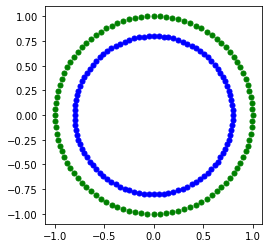

In [110]:
fig, ax = plt.subplots()
colors = ('green', 'blue')

for n_class in range(2):
    ax.scatter(X[y == n_class][:, 0], 
               X[y == n_class][:, 1], 
               c=colors[n_class], 
               s=25, 
               label=str(n_class))
    ax.set_aspect('equal', adjustable='box')

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  309
Training accuracy:  1.0
Test accuracy:  1.0


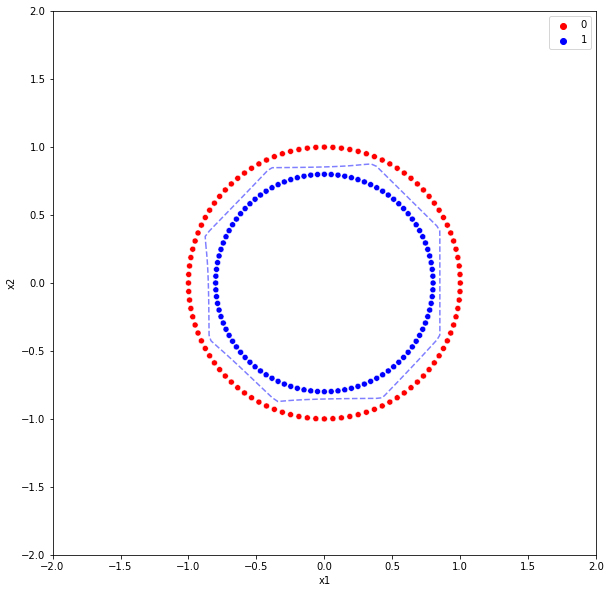

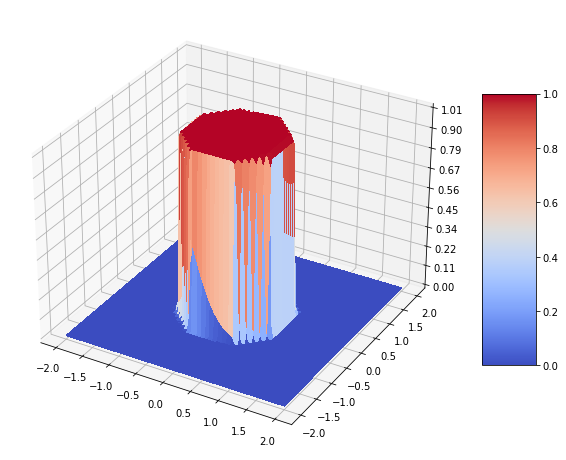

In [111]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  717
Training accuracy:  1.0
Test accuracy:  1.0


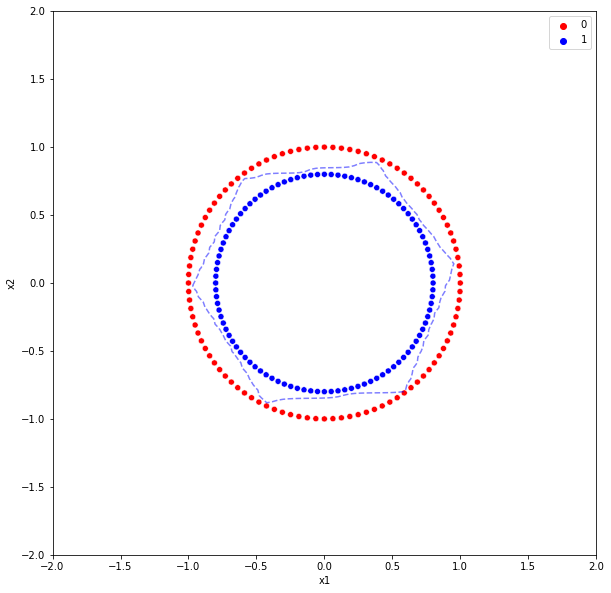

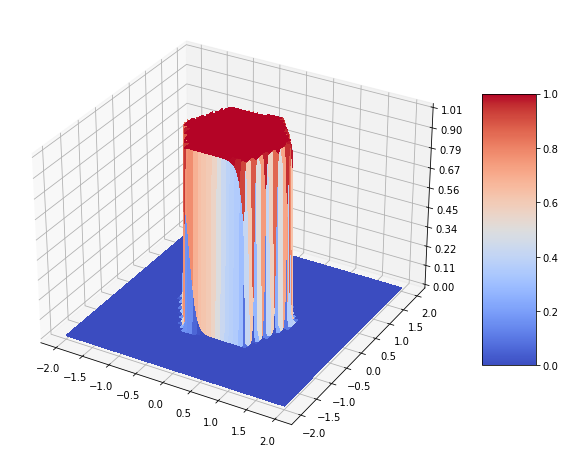

In [118]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  427
Training accuracy:  1.0
Test accuracy:  1.0


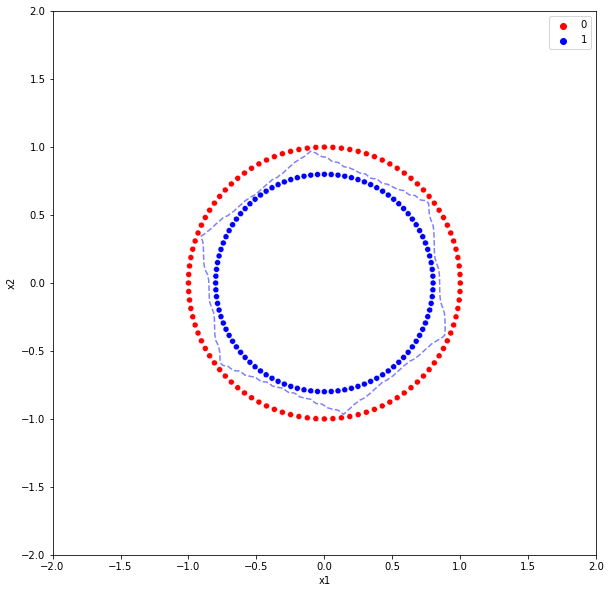

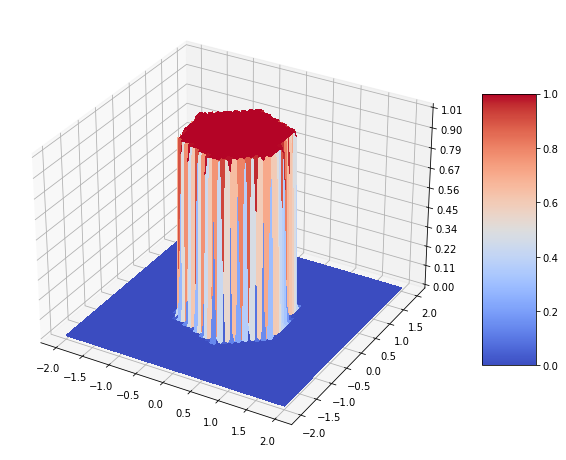

In [124]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(4))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

> It is possible to generate a Classifier with only 4 hidden layer neurons with 0 training error. 

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  40
Training accuracy:  0.6388888888888888
Test accuracy:  0.55


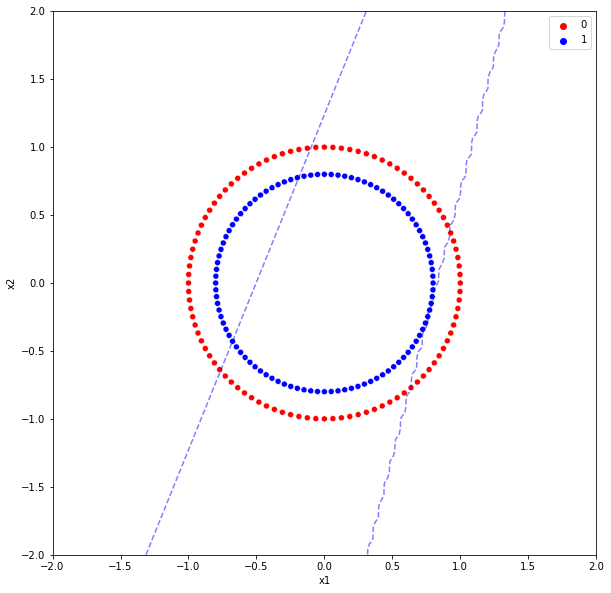

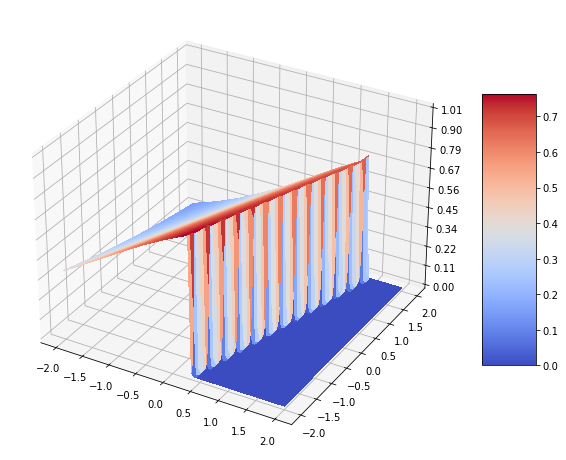

In [129]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(3))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

> It is not possible to generate an MLP classifier contining 3 hidden layer neurons with 0 training error.

Output activation function:  logistic
Number of Layers:  4
Number of Hidden Layers:  2
Number of Iterations:  316
Training accuracy:  1.0
Test accuracy:  1.0


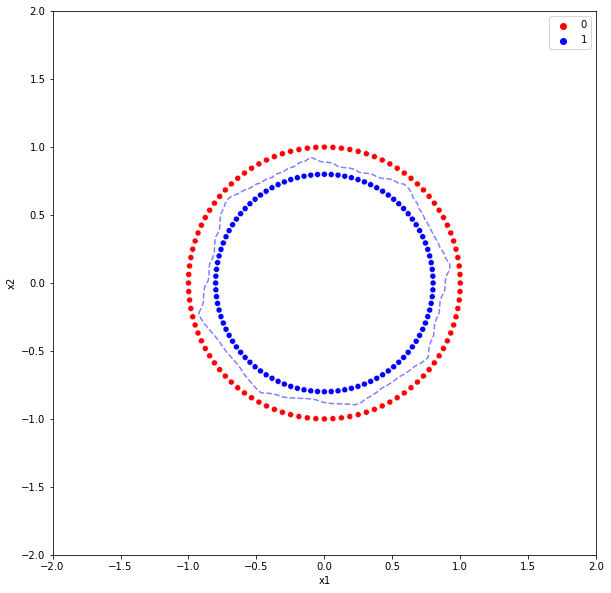

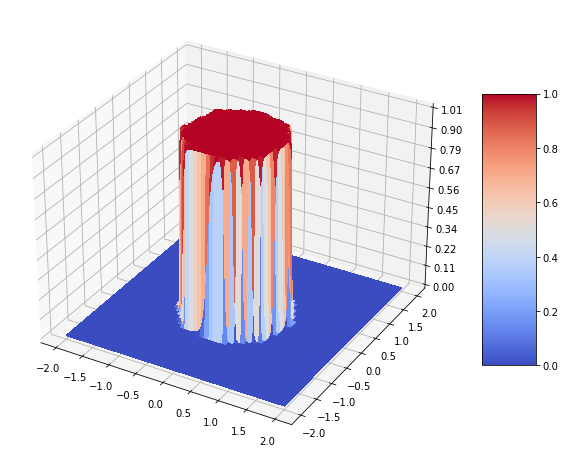

In [131]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5,5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  4
Number of Hidden Layers:  2
Number of Iterations:  2223
Training accuracy:  1.0
Test accuracy:  1.0


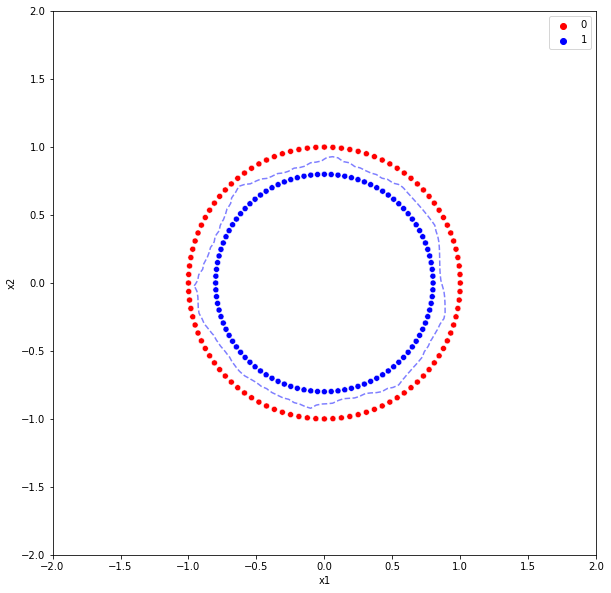

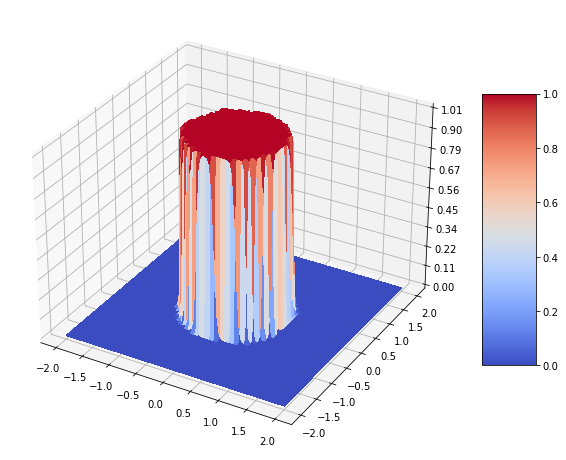

In [133]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(3,4))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  5
Number of Hidden Layers:  3
Number of Iterations:  284
Training accuracy:  1.0
Test accuracy:  1.0


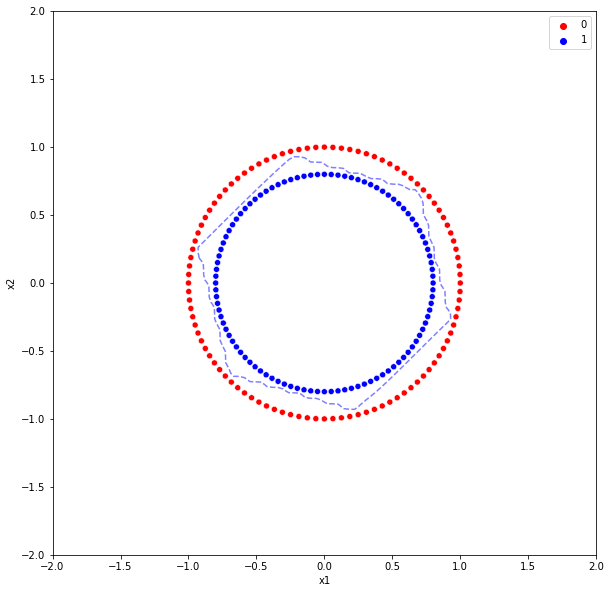

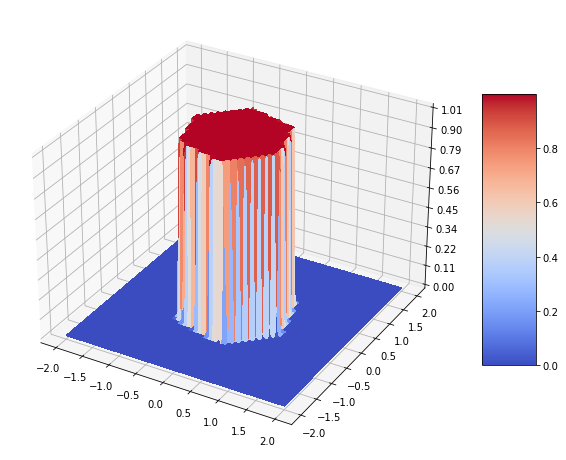

In [136]:
clf = MLPClassifier(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(3,5,3))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

> Adding more hidden layers still provides a marked improvement over single layer classifiers.  

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  7
Training accuracy:  0.5444444444444444
Test accuracy:  0.3


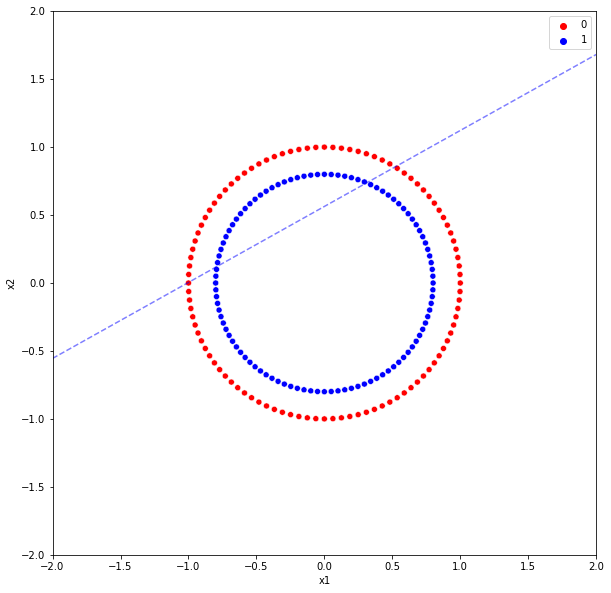

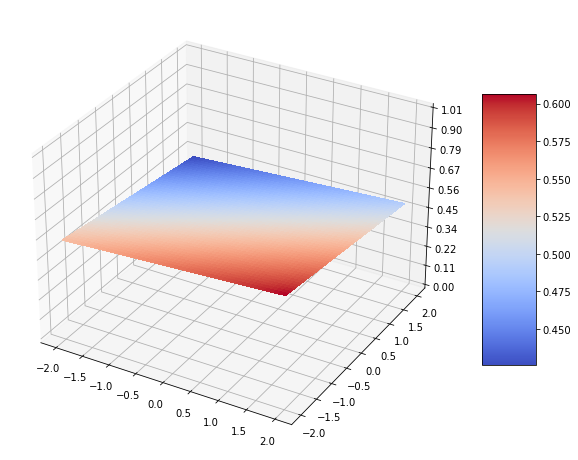

In [138]:
clf = MLPClassifier(activation= 'identity',solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  291
Training accuracy:  1.0
Test accuracy:  1.0


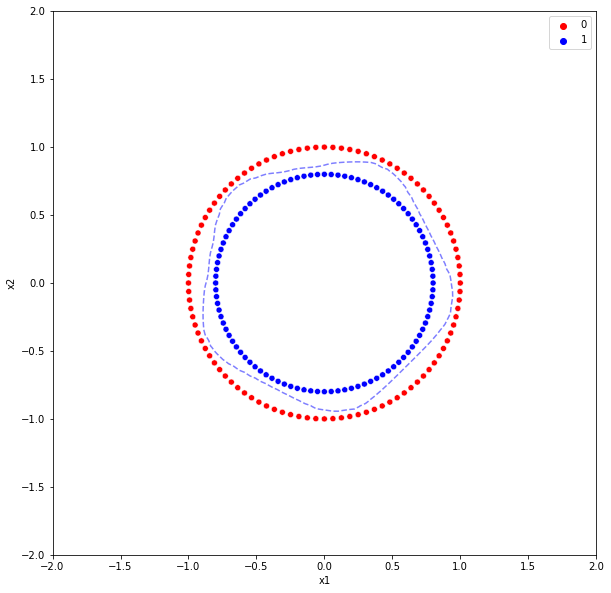

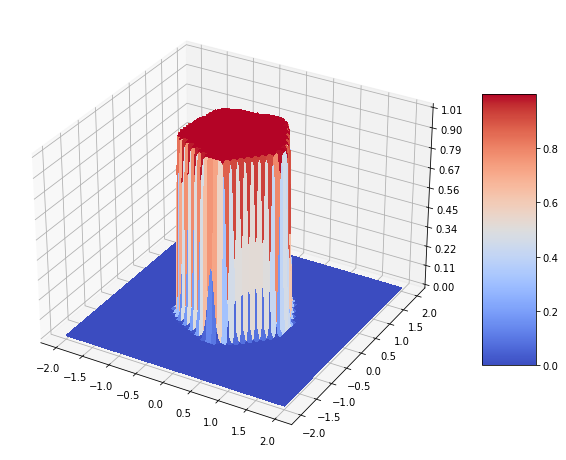

In [137]:
clf = MLPClassifier(activation= 'logistic',solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

Output activation function:  logistic
Number of Layers:  3
Number of Hidden Layers:  1
Number of Iterations:  491
Training accuracy:  1.0
Test accuracy:  1.0


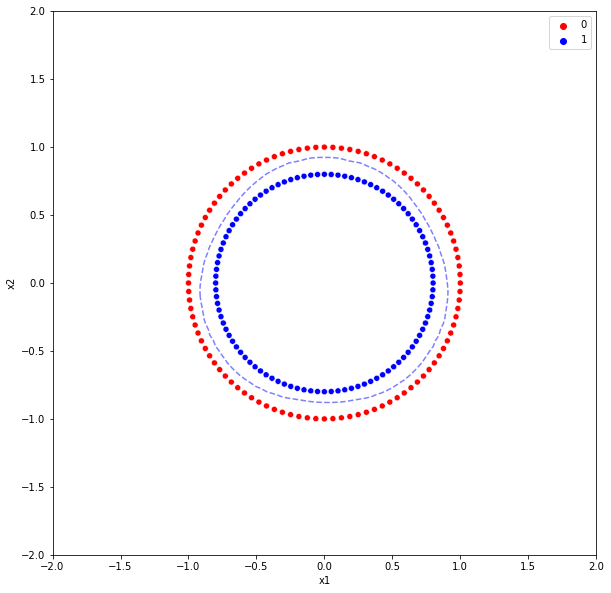

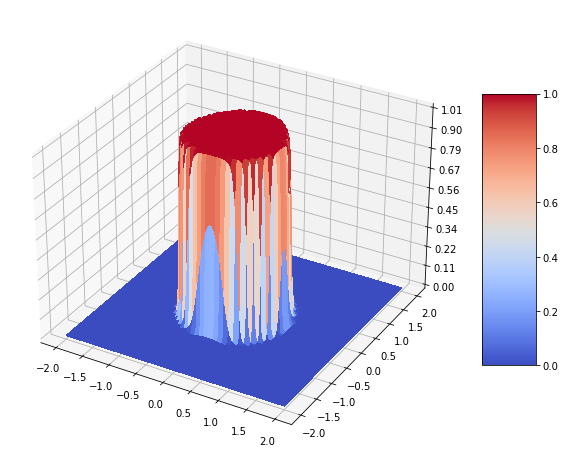

In [139]:
clf = MLPClassifier(activation= 'tanh',solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))  # Input your own parameters
clf.fit(X_train, y_train)

print("Output activation function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Hidden Layers: ", (clf.n_layers_ - 2))
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X_train,y_train))
print("Test accuracy: ", clf.score(X_test,y_test))

plot_classifier(X)
plot_classifier_3d()

> Changing the activation function to logistic or tanh provides a marked improvement over the default(tanh moreso than logistic). However, identity makes the classifier worse.

> __Minimum Number of Hidden Layer Neurons:__ The minimum number of hidden layer neurons (in a single layer) to perfectly separate this particular dataset is 4.

## Computer Exercise 7.2 (Multilayer Perceptrons for Regression): ##

## Regression

Create chirp signal and make a plot of the data.

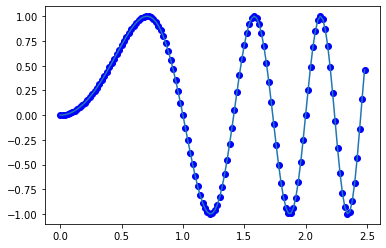

In [140]:
X = np.arange(0,2.5,.02).reshape(-1,1)
X_train = np.random.uniform(-1,1,50).reshape(-1,1)
y = np.sin(np.pi*X**2).ravel()
plt.plot(X,y,'bo')
plt.plot(X,y)

### Questions ###
__i.__ What is the default activation function in the hidden layer of MLPRegressor?
> As with the classifier, the default activation function is ReLU. 

__ii.__ What activation function is used for the output neuron, and what error is minimized?
> The output function is 'identity'. As this is regression, the error being minimized is the mean-squared error (MSE) 

__iii.__ Write down an expression for the output of a single hidden layer MLP with activation function φ(·) in the hidden layer, coefficients $w_1^k$ in the hidden layer and $w_2^k$ in the output layer.

Original Equation: $$ y_j^l = φ(\langle w_j^l, y^{l-1} \rangle)$$

Single hidden layer => L=3 layers total: $w_0^k$, $w_1^k$, $w_2^k$

Weight matrix: $$ \textbf{W}^l = [\textbf{w}_0^k, \textbf{w}_1^k, \textbf{w}_2^k] $$


$$ \textbf{v}^l = (\textbf{y}^{l-1})^T\textbf{W}^l $$

$$ y_j^3(n) = φ(\langle w_j^3(n), y^2 \rangle) \; ; \; j = 0, 1, 2$$

### Design an MLP Regressor for the Chirp Signal

In [141]:
clf = MLPRegressor() # Input your own parameters 
clf.fit(X,y)

print("Output Activation Function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X,y))

Output Activation Function:  identity
Number of Layers:  3
Number of Iterations:  190
Training accuracy:  0.19057835901154663


In [172]:
clf = MLPRegressor(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(180)) # Input your own parameters 
clf.fit(X,y)

print("Output Activation Function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X,y))

Output Activation Function:  identity
Number of Layers:  3
Number of Iterations:  3017
Training accuracy:  0.994812504144486


### Plot the MLP Model and Compare it to the True Function

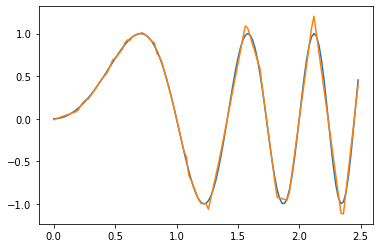

In [173]:
y_pred = clf.predict(X)
fig, ax = plt.subplots()
plt.plot(X,y)
plt.plot(X,y_pred)

## Experiment: ##

__i.__ Design a single hidden layer MLP that achieves a mean-square error of less than $10^{−3}$. How many parameters are there in your MLP?


Output Activation Function:  identity
Number of Layers:  3
Number of Iterations:  2620
Training accuracy:  0.9990881445034759


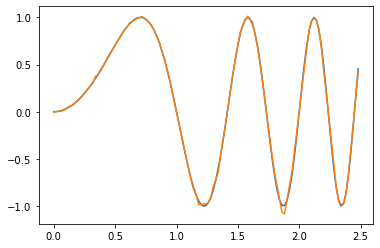

In [290]:
clf = MLPRegressor(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(400)) # Input your own parameters 
clf.fit(X,y)

print("Output Activation Function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X,y))

y_pred = clf.predict(X)
fig, ax = plt.subplots()
plt.plot(X,y)
plt.plot(X,y_pred)

Find the mean square error in the model.

In [291]:
print('MSE ',mean_squared_error(y,y_pred))

MSE  0.0003897015172576146


> Seen above is my single hidden layer MLP that achieves a mean-square error of less than $10^{−3}$. The number of parameters are calculated below:

> Weights: $(N_0 \times N_1) + (N_1 \times N_2) + (N_2 \times N_3)$ _(there is no $N_3$ in this case)_ $$(1 \times 400) + (400 \times 1) = 800 $$ Biases: $ N_1 + N_2 + N_3$ $$ 400 + 1 = 401 $$ # of parameters = $$ 800 + 401 = 1201 \: parameters$$



__ii.__ How does this design compare to a nonlinear perceptron using a polynomial kernel? Which representation is the most efficient?
> __NOTE:__ In sciKit learn, there is no perceptron with a kernel parameter. Though we have previously modified a linear perceptron to act as nonlinear, the dataset had a depth to each such that adding polyniomial terms was simple. However, this set of X values only has a depth of 1 and as such does not lend itself well to concattenating terms to my knowlege. As such, for this question I am forced to speculate on it. ___Addendum:___ During office hours, Dr. Hayes mentioned using the Kernel Ridge Regressor to see how well the chirp function could be approximated by a polynomial function.

> The chirp signal is a sinusoidal function and as such cannot be accurately plotted by a polynomial. According to Taylor series, it can be estimated for a certain range however. Since we are operating within the range [0, 2.5] and there are about 6 zero-crossings, we would require at least a 6th degree polynomial. As such, a nonlinear perceptron using a polynomial kernel would use a lot of components. As seen below, I have run a kernel regression with a polynomial kernel. As you can see, even with a degree of 15, the Kernel Ridge cannot perform nearly as well as the MLP regressor. I would say that the MLPRegressor representaion would be the best

Accuracy Score:  0.8222549612775577
MSE  0.07596325463759575


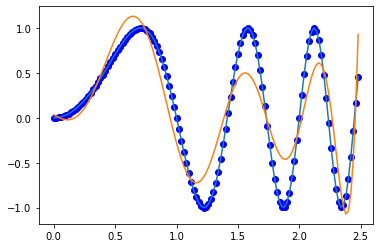

In [362]:

from sklearn.kernel_ridge import KernelRidge
import numpy as np

X = np.arange(0,2.5,.02).reshape(-1,1)
X_train = np.arange(-1,1, 0.02).reshape(-1,1)
y = np.sin(np.pi*X**2).ravel()
y_train = np.sin(np.pi*X_train**2).ravel()
plt.plot(X,y,'bo')
#plt.plot(X,y)

krr = KernelRidge(kernel= 'poly', degree= 15, alpha=1.0)
krr.fit(X, y)

print("Accuracy Score: ", krr.score(X,y))

y_pred = krr.predict(X)

print('MSE ',mean_squared_error(y,y_pred))

plt.plot(X,y)
plt.plot(X,y_pred)

__iii.__ What does your MLP do if you try to predict the function outside the range [0, 2.5]?

> Since the MLP has only been trained for points within the range [0, 2.5], the MLP veers off traveling towards $-\infty$ as x decreases past 0 and $+\infty$ as x increases above 2.5. This behavior is seen below.

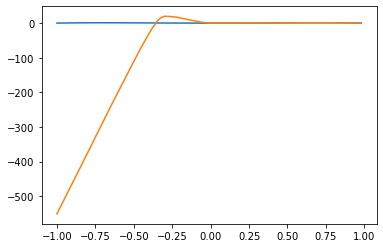

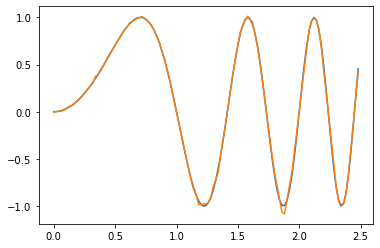

In [302]:
#X = np.arange(0,2.5,.02).reshape(-1,1)
X_train = np.arange(-1,1, 0.02).reshape(-1,1)
#y = np.sin(np.pi*X**2).ravel()
y_train = np.sin(np.pi*X_train**2).ravel()
#plt.plot(X,y,'bo')
#plt.plot(X,y)

y_pred = clf.predict(X_train)
fig, ax = plt.subplots()
plt.plot(X_train, y_train)
plt.plot(X_train, y_pred)

y_pred_1 = clf.predict(X)
fig, ax = plt.subplots()
plt.plot(X, y)
plt.plot(X, y_pred_1)

X_train = np.arange(-1,1, 0.02).reshape(-1,1)
#y = np.sin(np.pi*X**2).ravel()
y_train = np.sin(np.pi*X_train**2).ravel()

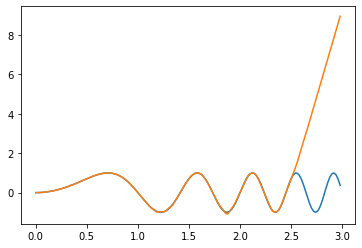

In [303]:
#X = np.arange(0,2.5,.02).reshape(-1,1)
X_train = np.arange(0,3, 0.02).reshape(-1,1)
#y = np.sin(np.pi*X**2).ravel()
y_train = np.sin(np.pi*X_train**2).ravel()
#plt.plot(X,y,'bo')
#plt.plot(X,y)

y_pred = clf.predict(X_train)
fig, ax = plt.subplots()
plt.plot(X_train, y_train)
plt.plot(X_train, y_pred)

__iv.__ There may be some advantages in going to a deeper network. With two hidden layers, how many neurons in each layer are necessary to achieve the same accuracy as your single hidden layer network?

>With two hidden layers, there are 150 neurons in the first hidden layer, and another 150 neurons in the second hidden layer. That totals up to 300 hidden layer neurons; which is 100 less than the single hidden layer regressor.  

Output Activation Function:  identity
Number of Layers:  4
Number of Iterations:  2328
Training accuracy:  0.9990871506789162
MSE  0.0003901262500582565


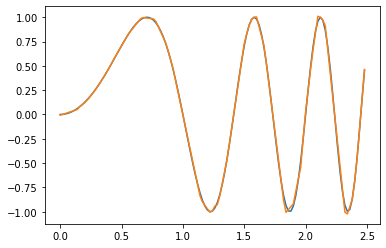

In [356]:
X = np.arange(0,2.5,.02).reshape(-1,1)
X_train = np.random.uniform(-1,1,50).reshape(-1,1)
y = np.sin(np.pi*X**2).ravel()

clf = MLPRegressor(solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(150, 150)) # Input your own parameters 
clf.fit(X,y)

print("Output Activation Function: ", clf.out_activation_)
print("Number of Layers: ", clf.n_layers_)
print("Number of Iterations: ", clf.n_iter_)
print("Training accuracy: ", clf.score(X,y))

y_pred = clf.predict(X)
fig, ax = plt.subplots()
plt.plot(X,y)
plt.plot(X,y_pred)

print('MSE ',mean_squared_error(y,y_pred))